In [1]:
import numpy as np
import sklearn
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

from perceptron import Perceptron
from layers.dense import Dense
from activations.relu import ReLU
from activations.sigmoid import Sigmoid
from losses.mse_loss import MSELoss
from optimizers.gradient_descent import OptimizerGD

In [2]:
X_cl, y_cl = make_classification(n_samples=200, n_features=4, random_state=42)
X_train_cl, X_test_cl, y_train_cl, y_test_cl = train_test_split(X_cl, y_cl, test_size=0.20)
X_train_cl = np.array(X_train_cl)
X_test_cl = np.array(X_test_cl)
y_train_cl = np.array(y_train_cl).reshape((len(y_train_cl),1))
y_test_cl = np.array(y_test_cl.reshape((len(y_test_cl),1)))
print(X_train_cl.shape)
print(X_test_cl.shape)
print(y_train_cl.shape)
print(y_test_cl.shape)

(160, 4)
(40, 4)
(160, 1)
(40, 1)


In [3]:
model = Perceptron()
model.add_layer(Dense(4, 16))
model.add_layer(ReLU())
model.add_layer(Dense(16, 1))
model.add_layer(Sigmoid())
model.set_loss(MSELoss(stopping_criterion=0.01))
model.set_optimizer(OptimizerGD(0.001))

In [4]:
cl_history = model.fit(200, X_train_cl, y_train_cl, False)
y_pred_cl = model.predict(X_test_cl)
y_pred_cl = np.round(y_pred_cl)
acc = sklearn.metrics.accuracy_score(y_test_cl, y_pred_cl)
prec = sklearn.metrics.precision_score(y_test_cl, y_pred_cl)
recall = sklearn.metrics.recall_score(y_test_cl, y_pred_cl)
f1 = sklearn.metrics.f1_score(y_test_cl, y_pred_cl)
print('Accuracy:', acc)
print('Precision:', prec)
print('Recall:', recall)
print('F1 score:', f1)

Accuracy: 0.775
Precision: 0.7272727272727273
Recall: 0.8421052631578947
F1 score: 0.7804878048780488


In [12]:
print('---Кастомная модель----')
print('Accuracy:', acc)
print('Precision:', prec)
print('Recall:', recall)
print('F1 score:', f1, end='\n\n')
print('---sklearn LogisticRegression----')
print('Accuracy:', acc_classif)
print('Precision:', prec_classif)
print('Recall:', recall_classif)
print('F1 score:', f1_classif)

---Кастомная модель----
Accuracy: 0.775
Precision: 0.7272727272727273
Recall: 0.8421052631578947
F1 score: 0.7804878048780488

---sklearn LogisticRegression----
Accuracy: 0.75
Precision: 0.6956521739130435
Recall: 0.8421052631578947
F1 score: 0.7619047619047619


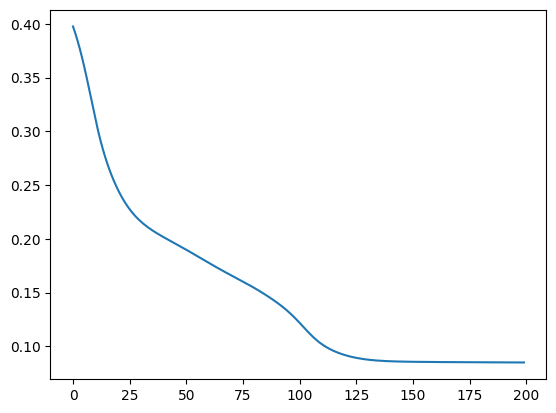

In [5]:
plt.plot(cl_history)

In [6]:
classif = LogisticRegression().fit(X_train_cl, y_train_cl)
classif_pred = classif.predict(X_test_cl)
acc_classif = sklearn.metrics.accuracy_score(y_test_cl, classif_pred)
prec_classif = sklearn.metrics.precision_score(y_test_cl, classif_pred)
recall_classif = sklearn.metrics.recall_score(y_test_cl, classif_pred)
f1_classif = sklearn.metrics.f1_score(y_test_cl, classif_pred)
print('Accuracy:', acc_classif)
print('Precision:', prec_classif)
print('Recall:', recall_classif)
print('F1 score:', f1_classif)

Accuracy: 0.75
Precision: 0.6956521739130435
Recall: 0.8421052631578947
F1 score: 0.7619047619047619


c:\Users\kechi\Desktop\perceptron\venv\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
